# Feb 13, 2022 (Ctx Affiliation)

**Motivation**: Divide cortex into 6 goarse groups.  They are: <br>

1. **Visual**:  ['VISpor', 'VISpl', 'VISp', 'VISl', 'VISli', 'VISal', 'VISrl'],
2. **Medial**:  ['RSPv', 'RSPd', 'RSPagl', 'VISpm', 'VISam', 'VISa'],
3. **Prefrontal**:  ['ACAv', 'ACAd', 'PL', 'FRP', 'ORBm', 'ORBvl', 'ORBl'],
4. **Somatomotor**:  ['SSp-tr', 'SSp-ll', 'SSp-ul', 'SSp-un', 'SSp-m', 'SSp-n', 'SSp-bfd', 'SSs', 'MOs', 'MOp'],
5. **Lateral**:  ['TEa', 'ECT', 'PERI', 'VISC', 'GU', 'AIp', 'AId', 'AIv'],
6. **Auditory**:  ['AUDpo', 'AUDp', 'AUDd', 'AUDv'],

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(128)

In [3]:
from register.parcellation import cortex_affiliations
obj_top, obj_flat, affiliation = cortex_affiliations()

In [4]:
f = 'parcel2d-top_10um.nii.gz'
f = pjoin(mice.cfg.parcel_dir, f)
parcel_top = ants.image_read(f, pixeltype='unsigned int')
parcel_top = parcel_top.numpy()

f = 'parcel2d-flat_10um.nii.gz'
f = pjoin(mice.cfg.parcel_dir, f)
parcel_flat = ants.image_read(f, pixeltype='unsigned int')
parcel_flat = parcel_flat.numpy()

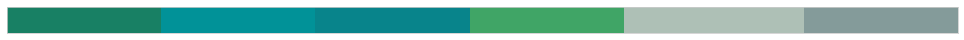

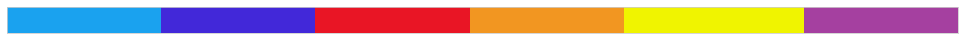

In [5]:
cmap_allen = get_affiliation_cmap()
cmap = get_affiliation_cmap(False)
display_cmap(cmap_allen)
display_cmap(cmap)

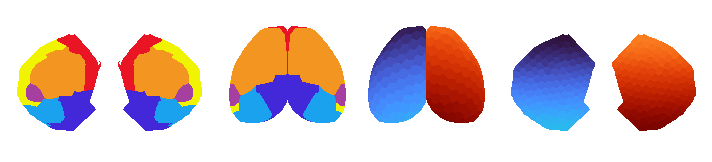

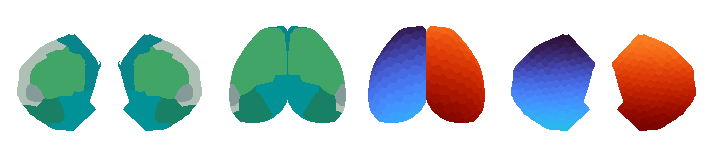

In [7]:
fig, axes = create_figure(1, 4, (10, 2.4), width_ratios=[1.6, 1, 1, 1.6])
x2plt = np.ma.masked_where(obj_flat == 0, obj_flat)
axes[0].imshow(x2plt, cmap=cmap)

x2plt = np.ma.masked_where(obj_top == 0, obj_top)
axes[1].imshow(x2plt, cmap=cmap);

x2plt = np.ma.masked_where(parcel_top == 0, parcel_top)
axes[2].imshow(x2plt, cmap='turbo')

x2plt = np.ma.masked_where(parcel_flat == 0, parcel_flat)
axes[3].imshow(x2plt, cmap='turbo')

remove_ticks(axes)
plt.show()


fig, axes = create_figure(1, 4, (10, 2.4), width_ratios=[1.6, 1, 1, 1.6])
x2plt = np.ma.masked_where(obj_flat == 0, obj_flat)
axes[0].imshow(x2plt, cmap=cmap_allen)

x2plt = np.ma.masked_where(obj_top == 0, obj_top)
axes[1].imshow(x2plt, cmap=cmap_allen);

x2plt = np.ma.masked_where(parcel_top == 0, parcel_top)
axes[2].imshow(x2plt, cmap='turbo')

x2plt = np.ma.masked_where(parcel_flat == 0, parcel_flat)
axes[3].imshow(x2plt, cmap='turbo')

remove_ticks(axes)
plt.show()

In [8]:
regions = np.unique(parcel_flat[parcel_flat.nonzero()])
hcl = mice.parcel.decode(regions)
regions_l = mice.parcel.encode(hcl[hcl[:, 0] == 1])
len(regions_l)

128

In [9]:
regions_affil = {
    r: {
        name: overlap_score(obj_flat == i, parcel_flat == r)
        for i, name in enumerate(affiliation, start=1)
    } for r in regions_l
}
regions_affil = {
    r: {k: np.round(v * 100, 1) for k, v in d.items()}
    for r, d in regions_affil.items()
}

In [10]:
regions_affil

{
    1: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 100.0,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    2: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 100.0,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    3: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 82.2,
        'Somatomotor': 0.0,
        'Lateral': 17.8,
        'Auditory': 0.0
    },
    4: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 100.0,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    5: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.1,
        'Somatomotor': 0.0,
        'Lateral': 99.9,
        'Auditory': 0.0
    },
    6: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 72.0,
        'Somatomotor': 10.0,
        'Lateral': 18.0,
        'Auditory': 0.0
    },
    7: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 100.0,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    8: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 0.0,
        'Lateral': 100.0,
        'Auditory': 0.0
    },
    9: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 14.8,
        'Lateral': 85.2,
        'Auditory': 0.0
    },
    10: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 100.0,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    11: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 0.0,
        'Lateral': 100.0,
        'Auditory': 0.0
    },
    12: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 97.8,
        'Somatomotor': 2.2,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    13: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 30.2,
        'Somatomotor': 69.8,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    14: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 48.1,
        'Lateral': 51.9,
        'Auditory': 0.0
    },
    15: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 92.4,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    16: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 0.0,
        'Lateral': 100.0,
        'Auditory': 0.0
    },
    17: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 100.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    18: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 69.8,
        'Lateral': 30.2,
        'Auditory': 0.0
    },
    19: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 59.8,
        'Somatomotor': 40.2,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    20: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 100.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    21: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 100.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    22: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 100.0,
        'Lateral': 0.0,
        'Auditory': 0.0
    },
    23: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 0.0,
        'Somatomotor': 39.4,
        'Lateral': 60.6,
        'Auditory': 0.0
    },
    24: {
        'Visual': 0.0,
        'Medial': 0.0,
        'Prefrontal': 85.6,
        'Somatomotor': 0.0,
        'Lateral': 0.0,
        '

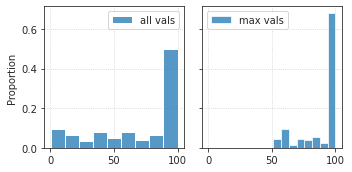

In [11]:
all_vals = []
for e in regions_affil.values():
    all_vals.extend(list(e.values()))
all_vals = np.array(all_vals)

max_vals = []
for e in regions_affil.values():
    max_vals.append(max(list(e.values())))
max_vals = np.array(max_vals)

fig, axes =create_figure(1, 2, (5, 2.5), 'all', 'all')
sns.histplot(all_vals[all_vals.nonzero()], label='all vals', stat='proportion', ax=axes[0])
sns.histplot(max_vals[max_vals.nonzero()], label='max vals', stat='proportion', ax=axes[1])
for ax in axes.flat:
    ax.legend()
    ax.grid()
plt.show()

In [12]:
regions_full = [r for r, d in regions_affil.items() if max(d.values()) > 80]
regions_full = mice.parcel.complement(regions_full)
len(regions_full), (max_vals > 80).mean()

(200, 0.78125)

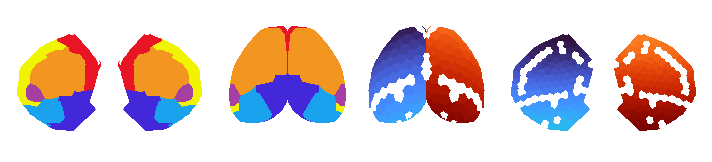

In [13]:
fig, axes = create_figure(1, 4, (10, 2.4), width_ratios=[1.6, 1, 1, 1.6])
x2plt = np.ma.masked_where(obj_flat == 0, obj_flat)
axes[0].imshow(x2plt, cmap=cmap)

x2plt = np.ma.masked_where(obj_top == 0, obj_top)
axes[1].imshow(x2plt, cmap=cmap);

x2plt = np.ma.masked_where(~np.isin(parcel_top, regions_full), parcel_top)
axes[2].imshow(x2plt, cmap='turbo')

x2plt = np.ma.masked_where(~np.isin(parcel_flat, regions_full), parcel_flat)
axes[3].imshow(x2plt, cmap='turbo')

remove_ticks(axes)
plt.show()

## 256

In [14]:
mice = Mice(256)

In [15]:
f = 'parcel2d-top_10um.nii.gz'
f = pjoin(mice.cfg.parcel_dir, f)
parcel_top = ants.image_read(f, pixeltype='unsigned int')
parcel_top = parcel_top.numpy()

f = 'parcel2d-flat_10um.nii.gz'
f = pjoin(mice.cfg.parcel_dir, f)
parcel_flat = ants.image_read(f, pixeltype='unsigned int')
parcel_flat = parcel_flat.numpy()

regions = np.unique(parcel_flat[parcel_flat.nonzero()])
hcl = mice.parcel.decode(regions)
regions_l = mice.parcel.encode(hcl[hcl[:, 0] == 1])

regions_affil = {
    r: {
        name: overlap_score(obj_flat == i, parcel_flat == r)
        for i, name in enumerate(affiliation, start=1)
    } for r in regions_l
}
regions_affil = {
    r: {k: np.round(v * 100, 1) for k, v in d.items()}
    for r, d in regions_affil.items()
}

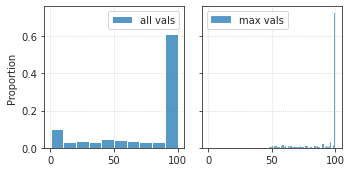

In [16]:
all_vals = []
for e in regions_affil.values():
    all_vals.extend(list(e.values()))
all_vals = np.array(all_vals)

max_vals = []
for e in regions_affil.values():
    max_vals.append(max(list(e.values())))
max_vals = np.array(max_vals)

fig, axes =create_figure(1, 2, (5, 2.5), 'all', 'all')
sns.histplot(all_vals[all_vals.nonzero()], label='all vals', stat='proportion', ax=axes[0])
sns.histplot(max_vals[max_vals.nonzero()], label='max vals', stat='proportion', ax=axes[1])
for ax in axes.flat:
    ax.legend()
    ax.grid()
plt.show()

In [17]:
regions_full = [r for r, d in regions_affil.items() if max(d.values()) > 80]
regions_full = mice.parcel.complement(regions_full)
len(regions_full), (max_vals > 80).mean()

(434, 0.84765625)

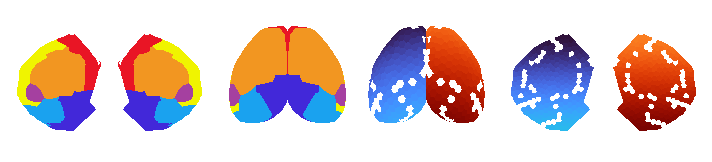

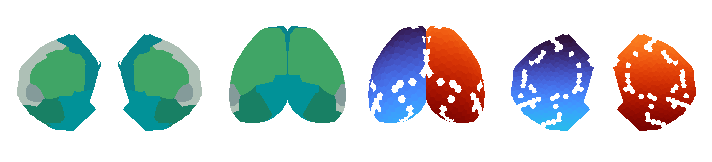

In [20]:
fig, axes = create_figure(1, 4, (10, 2.4), width_ratios=[1.6, 1, 1, 1.6])
x2plt = np.ma.masked_where(obj_flat == 0, obj_flat)
axes[0].imshow(x2plt, cmap=cmap)

x2plt = np.ma.masked_where(obj_top == 0, obj_top)
axes[1].imshow(x2plt, cmap=cmap);

x2plt = np.ma.masked_where(~np.isin(parcel_top, regions_full), parcel_top)
axes[2].imshow(x2plt, cmap='turbo')

x2plt = np.ma.masked_where(~np.isin(parcel_flat, regions_full), parcel_flat)
axes[3].imshow(x2plt, cmap='turbo')

remove_ticks(axes)
plt.show()


fig, axes = create_figure(1, 4, (10, 2.4), width_ratios=[1.6, 1, 1, 1.6])
x2plt = np.ma.masked_where(obj_flat == 0, obj_flat)
axes[0].imshow(x2plt, cmap=cmap_allen)

x2plt = np.ma.masked_where(obj_top == 0, obj_top)
axes[1].imshow(x2plt, cmap=cmap_allen);

x2plt = np.ma.masked_where(~np.isin(parcel_top, regions_full), parcel_top)
axes[2].imshow(x2plt, cmap='turbo')

x2plt = np.ma.masked_where(~np.isin(parcel_flat, regions_full), parcel_flat)
axes[3].imshow(x2plt, cmap='turbo')

remove_ticks(axes)
plt.show()